# NN Demo
In this notebook, the following is done:

 * A sample dataset is created
 * MLP is imported from mautograd.nn module and trained on the dataset using autograd
 * The final fit is shown

Nice and simple!

In [25]:
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
from matprop.nn import MLP
from matprop.losses import mse_loss

In [26]:
# Function that will be modeled with our MLP
def test_function(x):  # f(x) = 2sin(x/2) with some noise
    return 2*np.sin(x/2) + np.random.normal(scale=0.2, size=x.shape)

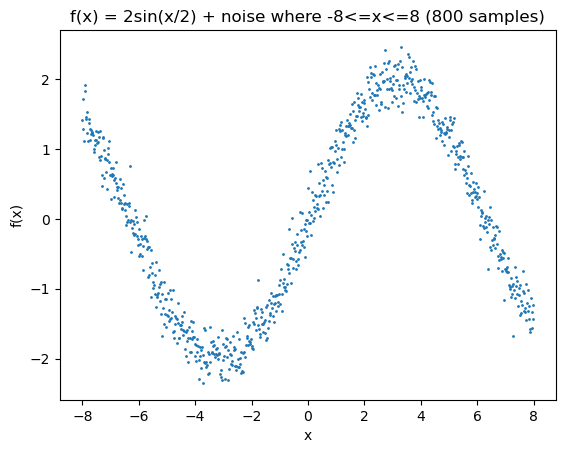

In [27]:
# Prepare the sample dataset
Xs = np.arange(-8, 8, 0.02).reshape((-1, 1, 1))  # (N, 1, 1) for matrices
ys = test_function(Xs)

Xvals = Xs.squeeze()  # flat values for
yvals = ys.squeeze()  # convienient plotting

# Plot the samples
plt.scatter(Xvals, yvals, s=1)
plt.title(f"f(x) = 2sin(x/2) + noise where -8<=x<=8 ({len(Xvals)} samples)")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.show()

In [28]:
# Create our model and train it (similar process to PyTorch)
model = MLP(n_inputs=1, layer_outputs=[12, 12, 1])
lr = 0.01
loss_hist = []

for epoch in tqdm(range(500)):
    # forward pass
    preds = [model(x) for x in Xs]
    loss = mse_loss(preds, ys)

    # backward pass
    model.zero_grad()
    loss.backward()

    # update
    for p in model.parameters():
        p.data -= lr * p.grad

    loss_hist.append(loss.data.squeeze())

100%|██████████| 500/500 [00:57<00:00,  8.65it/s]


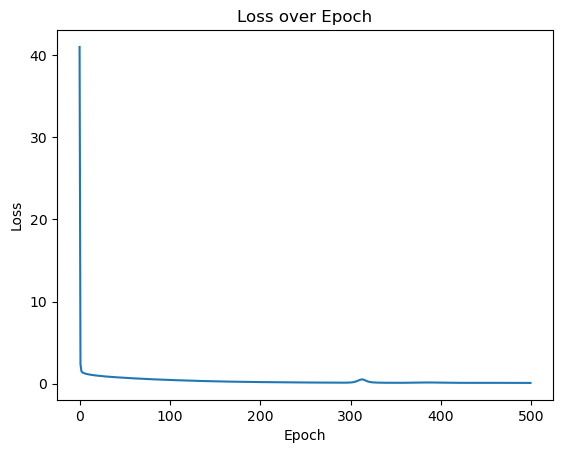

In [29]:
# Plot the loss over epochs
plt.plot(loss_hist)
plt.title("Loss over Epoch")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

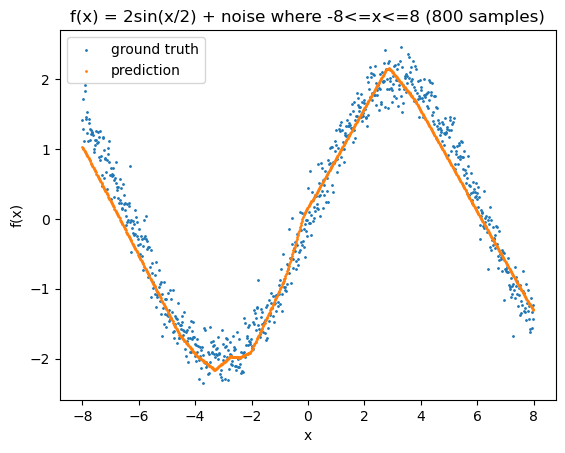

In [30]:
# Plot the fit
preds = np.squeeze([model(x).data for x in Xs])
plt.scatter(Xvals, yvals, label="ground truth", s=1)
plt.scatter(Xvals, preds, label="prediction", s=1)
plt.title(f"f(x) = 2sin(x/2) + noise where -8<=x<=8 ({len(Xvals)} samples)")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.show()